In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
df_fake=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
df_true=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

### Data PreProcessing

In [19]:
# setting label as 0 for fake
df_fake['label']=0
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [20]:
# setting label 1 for true
df_true['label']=1
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [22]:
# merging both fake and true datasets
df=pd.concat([df_fake,df_true])

In [61]:
df=df.sample(frac=1)
df.reset_index(inplace=True)

In [64]:
df.drop('index',axis=1,inplace=True)

In [65]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

### Exploratory Data Analysis

In [66]:
import seaborn as sns
sns.set_style('darkgrid')

<AxesSubplot:>

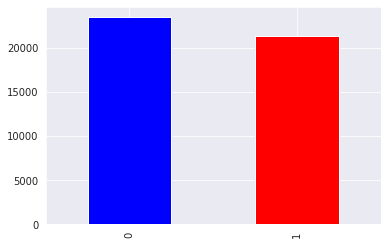

In [67]:
df['label'].value_counts().plot.bar(color=['blue','red'])

In [68]:
df['subject'].unique()

array(['politicsNews', 'worldnews', 'left-news', 'News', 'US_News',
       'politics', 'Government News', 'Middle-east'], dtype=object)

<AxesSubplot:>

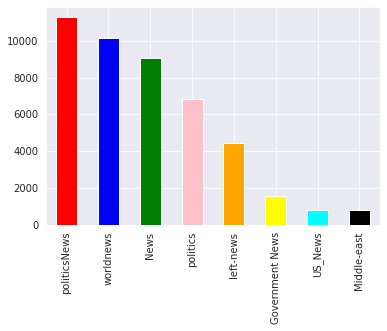

In [69]:
df['subject'].value_counts().plot.bar(color=['red','blue','green','pink','orange','yellow','cyan','black'])

### Text Cleaning

In [70]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [76]:
y=df['label']
x=df.drop('label',axis=1)

In [78]:
news=x.copy()

In [90]:
news['title'][0]

'Puerto Rico governor ups revenue forecast in revised fiscal plan'

In [81]:
import nltk
import re
from nltk.corpus import stopwords

In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(len(news)):
    # removing everything except alphabets
    text=re.sub('[^a-zA-Z]',' ',news['title'][i])
    text=text.lower()
    text_words=text.split()
    stem_words=[WordNetLemmatizer().lemmatize(word) for word in text_words if word not in stopwords.words('english') ]
    text=' '.join(stem_words)
    corpus.append(text)

In [89]:
corpus[:5]

['puerto rico governor ups revenue forecast revised fiscal plan',
 'contentious case await trump u high court nominee gorsuch',
 'macron europe speech draw mixed reaction berlin',
 'walmart remove controversial shirt black life matter tee remain',
 'racist explode old navy ad internet perfectly responds tweet']

### Word Embedding

In [91]:
# one-hot representation  of our corpus
vocab_size=50000
onehot_corpus=[one_hot(words,vocab_size) for words in corpus]
onehot_corpus[:5]

[[15271, 1128, 18936, 3795, 32854, 5901, 19801, 46771, 32910],
 [10497, 38123, 24504, 26461, 13639, 18126, 40976, 15216, 8060],
 [46904, 26319, 34722, 2333, 5082, 34311, 37646],
 [40408, 11555, 10548, 47522, 46216, 36949, 551, 29698, 40272],
 [5382, 16152, 31519, 3955, 7313, 8679, 5447, 18665, 7088]]

In [92]:
# padding every one-hot encoded sentence in corpus to make them of equal length
max_length=20
embedded_docs=pad_sequences(onehot_corpus,maxlen=max_length,padding='pre')
embedded_docs[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0, 15271,  1128, 18936,  3795, 32854,  5901, 19801,
        46771, 32910],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0, 10497, 38123, 24504, 26461, 13639, 18126, 40976,
        15216,  8060],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 46904, 26319, 34722,  2333,  5082,
        34311, 37646],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0, 40408, 11555, 10548, 47522, 46216, 36949,   551,
        29698, 40272],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,  5382, 16152, 31519,  3955,  7313,  8679,  5447,
        18665,  7088]], dtype=int32)

In [93]:
features=50
model=Sequential()
# Embedding layer
model.add(Embedding(vocab_size,features,input_length=max_length))
# Long Short Term Memory layer
model.add(LSTM(100))
# Output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            2500000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,560,501
Trainable params: 2,560,501
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
x=np.array(embedded_docs)
x.shape

(44898, 20)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Model Training

In [101]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/5
492/492 [==============================] - 23s 47ms/step - loss: 0.0739 - accuracy: 0.9734 - val_loss: 0.1250 - val_accuracy: 0.9529
Epoch 2/5
492/492 [==============================] - 23s 46ms/step - loss: 0.0467 - accuracy: 0.9835 - val_loss: 0.1356 - val_accuracy: 0.9509
Epoch 3/5
492/492 [==============================] - 22s 46ms/step - loss: 0.0292 - accuracy: 0.9897 - val_loss: 0.1797 - val_accuracy: 0.9520
Epoch 4/5
492/492 [==============================] - 23s 46ms/step - loss: 0.0172 - accuracy: 0.9938 - val_loss: 0.1891 - val_accuracy: 0.9503
Epoch 5/5
492/492 [==============================] - 22s 46ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.2634 - val_accuracy: 0.9506


### Model Evaluation

In [104]:
y_pred=model.predict_classes(x_test)
y_pred[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [106]:
y_test[:5]

35305    0
29180    0
29805    0
38237    1
5099     0
Name: label, dtype: int64

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7140
           1       0.94      0.95      0.95      6330

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



<AxesSubplot:>

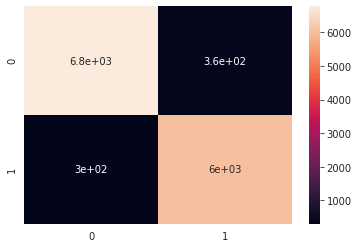

In [109]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)